## ***Project Name: EMIPredict AI - Intelligent Financial Risk Assessment Platform***

#### Project done by : Manav Bhavsar

***Github Profile:*** https://github.com/mechahuman  
***Github Repo:*** https://github.com/mechahuman/EMI-Predicting-System

## Problem Statement
Build a comprehensive financial risk assessment platform that integrates machine 
learning models with MLflow experiment tracking to create an interactive web 
application for EMI prediction. 
Nowadays, people struggle to pay EMI due to poor financial planning and inadequate 
risk assessment. This project aims to solve this critical issue by providing data-driven 
insights for better loan decisions. 
The platform should deliver: 
+  Dual ML problem solving: Classification (EMI eligibility) and Regression 
 (maximum EMI amount) 
+  Real-time financial risk assessment using 400,000 records 
+ Advanced feature engineering from 22 financial and demographic variables 
+ ML flow integration for model tracking and comparison 
+ Streamlit Cloud deployment for production-ready access 
+ Complete CRUD operations for financial data management

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer

In [3]:
df = pd.read_csv("emi_prediction_dataset.csv")

C:\Users\manav\AppData\Local\Temp\ipykernel_11524\1407759746.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("emi_prediction_dataset.csv")


In [4]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,Yes,23700.0,660.0,303200.0,70200.0,Personal Loan EMI,850000.0,15,Not_Eligible,500.0
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,Yes,4100.0,714.0,92500.0,26900.0,E-commerce Shopping EMI,128000.0,19,Not_Eligible,700.0
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,No,0.0,650.0,672100.0,324200.0,Education EMI,306000.0,16,Eligible,27775.0
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,No,0.0,685.0,440900.0,178100.0,Vehicle EMI,304000.0,83,Eligible,16170.0
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,No,0.0,770.0,97300.0,28200.0,Home Appliances EMI,252000.0,7,Not_Eligible,500.0


In [5]:
df.shape

(404800, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          404800 non-null  object 
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

In [7]:
df['monthly_salary'] = pd.to_numeric(df["monthly_salary"], errors = 'coerce')
df['bank_balance'] = pd.to_numeric(df["bank_balance"], errors = 'coerce')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404800 entries, 0 to 404799
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     404800 non-null  object 
 1   gender                  404800 non-null  object 
 2   marital_status          404800 non-null  object 
 3   education               402396 non-null  object 
 4   monthly_salary          402807 non-null  float64
 5   employment_type         404800 non-null  object 
 6   years_of_employment     404800 non-null  float64
 7   company_type            404800 non-null  object 
 8   house_type              404800 non-null  object 
 9   monthly_rent            402374 non-null  float64
 10  family_size             404800 non-null  int64  
 11  dependents              404800 non-null  int64  
 12  school_fees             404800 non-null  float64
 13  college_fees            404800 non-null  float64
 14  travel_expenses     

### ***HANDLING MISSING VALUES***

In [9]:
df.isna().sum()

age                          0
gender                       0
marital_status               0
education                 2404
monthly_salary            1993
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent              2426
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              4392
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

In [10]:
# HANDLING MISSING VALUES

# education first
pd.crosstab(df['education'],df['marital_status'],normalize='columns') * 100


marital_status,Married,Single
education,,
Graduate,45.055979,44.756718
High School,15.099377,15.071065
Post Graduate,24.901146,25.018155
Professional,14.943498,15.154062


In [11]:
# Since the correaltion is almost equal we can randomly put the value for education
import random


ed = df['education'].value_counts().index.tolist()
df['education'] = df['education'].fillna(random.choice(ed))

In [12]:
# NOW WE FILL 'monthly_rent' MISSING VALUES

num_cols = df.select_dtypes(include = 'number').columns

corrs = df[num_cols].corr()['monthly_rent'].sort_values(ascending=False)


In [13]:
corrs

monthly_rent              1.000000
groceries_utilities       0.297642
travel_expenses           0.273728
other_monthly_expenses    0.254352
bank_balance              0.209810
monthly_salary            0.208328
emergency_fund            0.189613
current_emi_amount        0.101954
credit_score              0.033349
college_fees              0.000867
requested_tenure          0.000777
years_of_employment       0.000386
requested_amount         -0.000967
dependents               -0.002316
family_size              -0.002316
school_fees              -0.003623
max_monthly_emi          -0.170097
Name: monthly_rent, dtype: float64

In [14]:
pd.crosstab(df['house_type'],df['monthly_rent'],normalize = 'columns') * 100

monthly_rent,0.0,1800.0,1900.0,2000.0,2100.0,2200.0,2300.0,2400.0,2500.0,2600.0,...,65500.0,67200.0,67300.0,68400.0,68600.0,68700.0,69200.0,74100.0,74900.0,80000.0
house_type,,,,,,,,,,,,,,,,,,,,,
Family,41.490164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Own,58.509836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rented,0.000000,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [15]:
# THIS SHOWS US THAT 'monthly_rent' IS Nan IF THE 'house_type' IS Family OR Own

df['monthly_rent'] = df['monthly_rent'].fillna(0)

In [16]:
df.isna().sum()

age                          0
gender                       0
marital_status               0
education                    0
monthly_salary            1993
employment_type              0
years_of_employment          0
company_type                 0
house_type                   0
monthly_rent                 0
family_size                  0
dependents                   0
school_fees                  0
college_fees                 0
travel_expenses              0
groceries_utilities          0
other_monthly_expenses       0
existing_loans               0
current_emi_amount           0
credit_score              2420
bank_balance              4392
emergency_fund            2351
emi_scenario                 0
requested_amount             0
requested_tenure             0
emi_eligibility              0
max_monthly_emi              0
dtype: int64

In [17]:
num_cols

Index(['monthly_salary', 'years_of_employment', 'monthly_rent', 'family_size',
       'dependents', 'school_fees', 'college_fees', 'travel_expenses',
       'groceries_utilities', 'other_monthly_expenses', 'current_emi_amount',
       'credit_score', 'bank_balance', 'emergency_fund', 'requested_amount',
       'requested_tenure', 'max_monthly_emi'],
      dtype='object')

In [18]:
# NOW WE WORK WITH THE 'credit_score' THAT HAS VALUE FROM 350-800
# WE COMPUTE THE MISSING VALUES USING 'KNNImputer'

imputer = KNNImputer(n_neighbors = 7)

new_features = ['monthly_salary','current_emi_amount', 'bank_balance','emergency_fund','credit_score']

df[new_features] = imputer.fit_transform(df[new_features])


In [19]:
df.isna().sum()

age                       0
gender                    0
marital_status            0
education                 0
monthly_salary            0
employment_type           0
years_of_employment       0
company_type              0
house_type                0
monthly_rent              0
family_size               0
dependents                0
school_fees               0
college_fees              0
travel_expenses           0
groceries_utilities       0
other_monthly_expenses    0
existing_loans            0
current_emi_amount        0
credit_score              0
bank_balance              0
emergency_fund            0
emi_scenario              0
requested_amount          0
requested_tenure          0
emi_eligibility           0
max_monthly_emi           0
dtype: int64

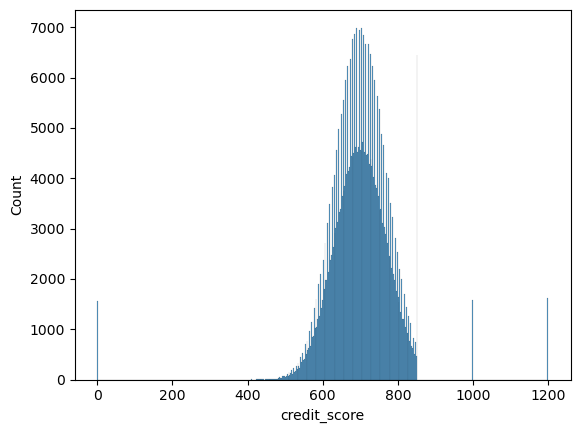

In [20]:
sns.histplot(df['credit_score'],bins=500);

We can see that the credit_score is between 350-800. There are very little outliers compared to the number of rows.

### ***ADDING SUFFICIENT DERIVED FEATURES***

In [21]:
# 1. Capturing the total monthly expenses

df['total_monthly_expenses'] = df['monthly_rent']+df['groceries_utilities']+df['travel_expenses']+df['school_fees']+df['college_fees']+df['other_monthly_expenses']

In [22]:
# 2. Available cash each month

df['disposable_income'] = df['monthly_salary'] - df['total_monthly_expenses']

In [23]:
# 3. Measuring financial stress from current EMIs

df['emi_to_income_ratio'] = df['current_emi_amount']/df['monthly_salary']

In [24]:
# 4. Credit worthiness indicator

df['debt_to_income_ratio'] = (df['current_emi_amount'] + df['requested_amount']/df['requested_tenure'])/df['monthly_salary']

In [25]:
# 5. Reflecting financial discipline by finding the 'savings_ratio'

df['savings_ratio'] = df['emergency_fund']/df['monthly_salary']

In [26]:
# 6. This column indicates if the requested loan is realistic or not

df['affordibility_index'] = df['disposable_income']/df['requested_amount']

In [27]:
# 7. This column indicates how big the loan is compared to the annual income

df['loan_to_salary_ratio'] = df['requested_amount']/(df['monthly_salary']*12)

In [28]:
# 8. This column indicates the general affordibilty gauge

df['expense_to_income_ratio'] = df['total_monthly_expenses']/df['monthly_salary']

In [29]:
# 9. This column adjusts affordibilty for family responsibilities

df['dependents_per_income'] = df['dependents']/df['monthly_salary']

In [30]:
# 10. This column finds the income per person in family

df['income_per_person'] = df['monthly_salary']/(df['family_size'] + 1)

In [31]:
df.head()

,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,total_monthly_expenses,disposable_income,emi_to_income_ratio,debt_to_income_ratio,savings_ratio,affordibility_index,loan_to_salary_ratio,expense_to_income_ratio,dependents_per_income,income_per_person
0,38.0,Female,Married,Professional,82600.0,Private,0.9,Mid-size,Rented,20000.0,...,59900.0,22700.0,0.286925,0.972962,0.849879,0.026706,0.857546,0.725182,0.000024,20650.000000
1,38.0,Female,Married,Graduate,21500.0,Private,7.0,MNC,Family,0.0,...,15400.0,6100.0,0.190698,0.504039,1.251163,0.047656,0.496124,0.716279,0.000047,7166.666667
2,38.0,Male,Married,Professional,86100.0,Private,5.8,Startup,Own,0.0,...,35600.0,50500.0,0.000000,0.222125,3.765389,0.165033,0.296167,0.413473,0.000035,17220.000000
3,58.0,Female,Married,High School,66800.0,Private,2.2,Mid-size,Own,0.0,...,37400.0,29400.0,0.000000,0.054830,2.666168,0.096711,0.379242,0.559880,0.000060,11133.333333
4,48.0,Female,Married,Professional,57300.0,Private,3.4,Mid-size,Family,0.0,...,58600.0,-1300.0,0.000000,0.628272,0.492147,-0.005159,0.366492,1.022688,0.000052,11460.000000


### ***CONFIRMING IF COLUMNS HAVE ONLY ONE DATATYPE***

In [32]:
df.dtypes

age                         object
gender                      object
marital_status              object
education                   object
monthly_salary             float64
employment_type             object
years_of_employment        float64
company_type                object
house_type                  object
monthly_rent               float64
family_size                  int64
dependents                   int64
school_fees                float64
college_fees               float64
travel_expenses            float64
groceries_utilities        float64
other_monthly_expenses     float64
existing_loans              object
current_emi_amount         float64
credit_score               float64
bank_balance               float64
emergency_fund             float64
emi_scenario                object
requested_amount           float64
requested_tenure             int64
emi_eligibility             object
max_monthly_emi            float64
total_monthly_expenses     float64
disposable_income   

In [33]:
mixed_cols = []
for col in df.columns:
    types = df[col].apply(lambda x: type(x)).unique()
    if len(types) > 1:
        mixed_cols.append((col, types))

print("Columns with mixed data types:", mixed_cols)

Columns with mixed data types: [('age', array([<class 'float'>, <class 'str'>], dtype=object))]


In [34]:
df['age'] = pd.to_numeric(df['age'], errors = 'coerce')

In [35]:
df.isna().sum()

age                        3
gender                     0
marital_status             0
education                  0
monthly_salary             0
employment_type            0
years_of_employment        0
company_type               0
house_type                 0
monthly_rent               0
family_size                0
dependents                 0
school_fees                0
college_fees               0
travel_expenses            0
groceries_utilities        0
other_monthly_expenses     0
existing_loans             0
current_emi_amount         0
credit_score               0
bank_balance               0
emergency_fund             0
emi_scenario               0
requested_amount           0
requested_tenure           0
emi_eligibility            0
max_monthly_emi            0
total_monthly_expenses     0
disposable_income          0
emi_to_income_ratio        0
debt_to_income_ratio       0
savings_ratio              0
affordibility_index        0
loan_to_salary_ratio       0
expense_to_inc

In [36]:
df = df.dropna(axis = 0)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404797 entries, 0 to 404799
Data columns (total 37 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   age                      404797 non-null  float64
 1   gender                   404797 non-null  object 
 2   marital_status           404797 non-null  object 
 3   education                404797 non-null  object 
 4   monthly_salary           404797 non-null  float64
 5   employment_type          404797 non-null  object 
 6   years_of_employment      404797 non-null  float64
 7   company_type             404797 non-null  object 
 8   house_type               404797 non-null  object 
 9   monthly_rent             404797 non-null  float64
 10  family_size              404797 non-null  int64  
 11  dependents               404797 non-null  int64  
 12  school_fees              404797 non-null  float64
 13  college_fees             404797 non-null  float64
 14  travel_ex

### ***VISUALIZATION***

#### 1. Overall Distribution Visualization

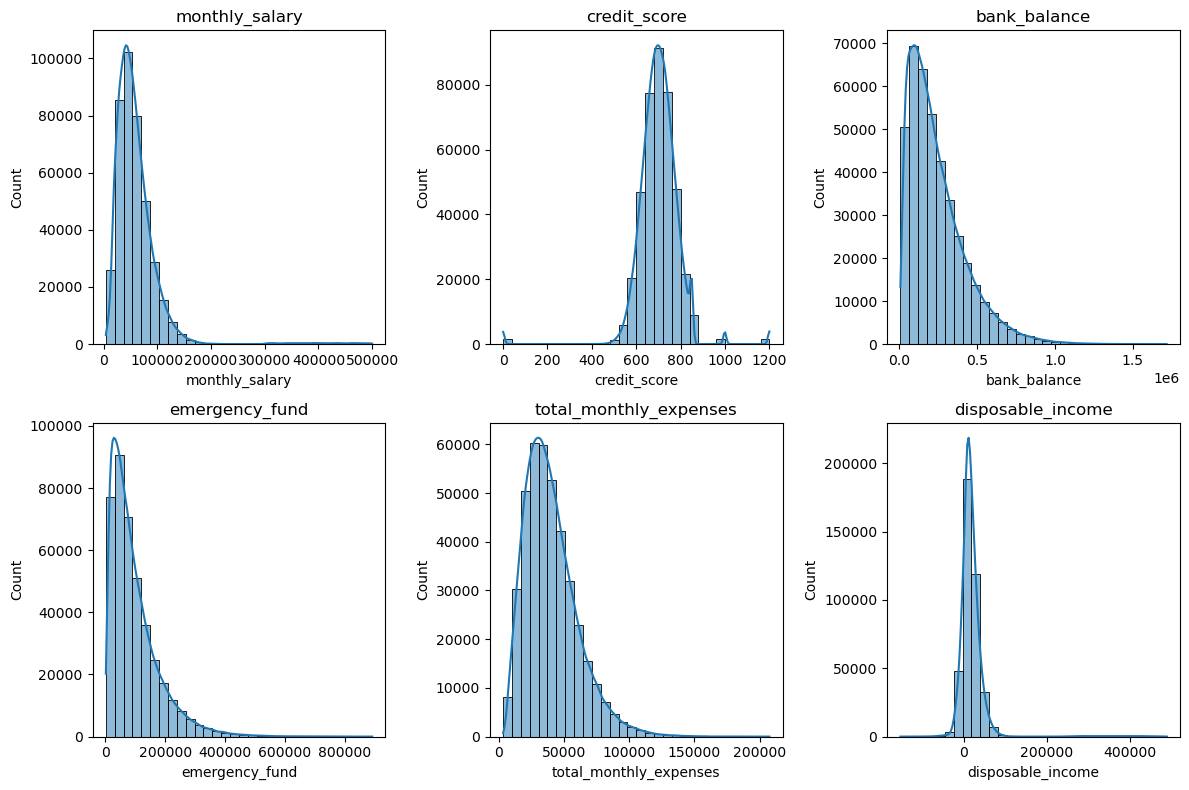

In [37]:
num_cols = ['monthly_salary','credit_score','bank_balance','emergency_fund',
            'total_monthly_expenses','disposable_income']

plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2,3,i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

#### 2. Monthly Income vs Total Expenses

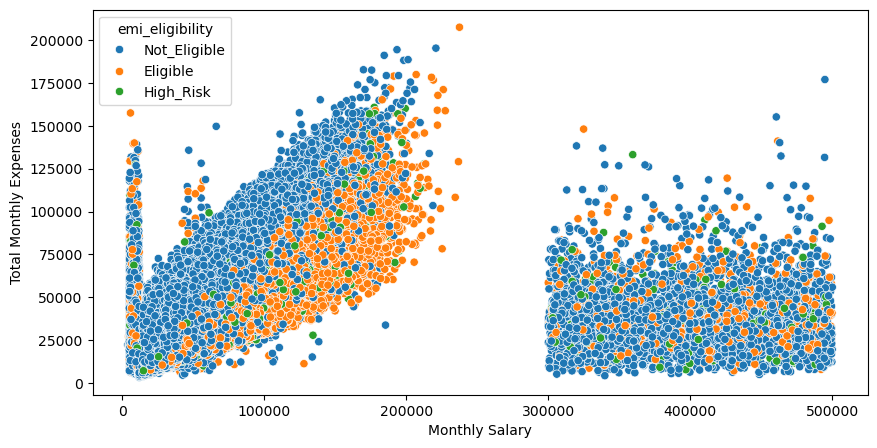

In [38]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='monthly_salary',y='total_monthly_expenses',hue='emi_eligibility',data=df)
plt.xlabel("Monthly Salary")
plt.ylabel("Total Monthly Expenses")
plt.show()

#### 3. EMI Eligibility Count per Marital Status

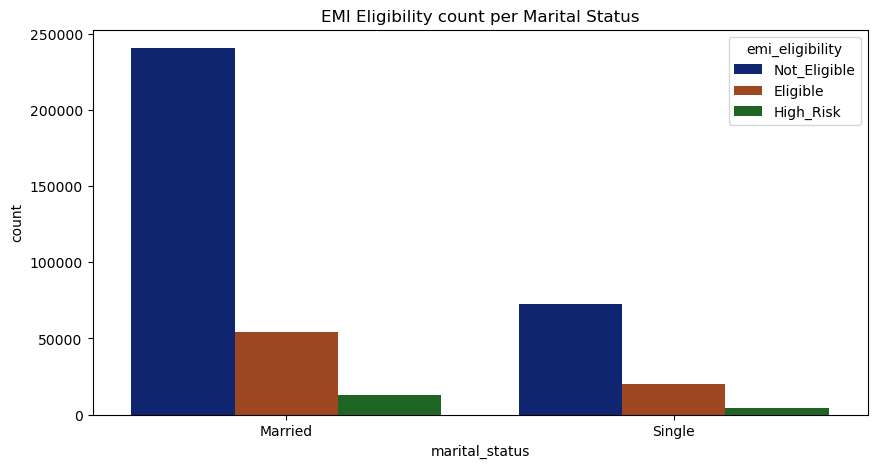

In [39]:
plt.figure(figsize=(10,5))
sns.countplot(x='marital_status',hue='emi_eligibility',data=df,palette = 'dark')
plt.title("EMI Eligibility count per Marital Status")
plt.show()

#### 4. EMI Eligibility count per Education Type

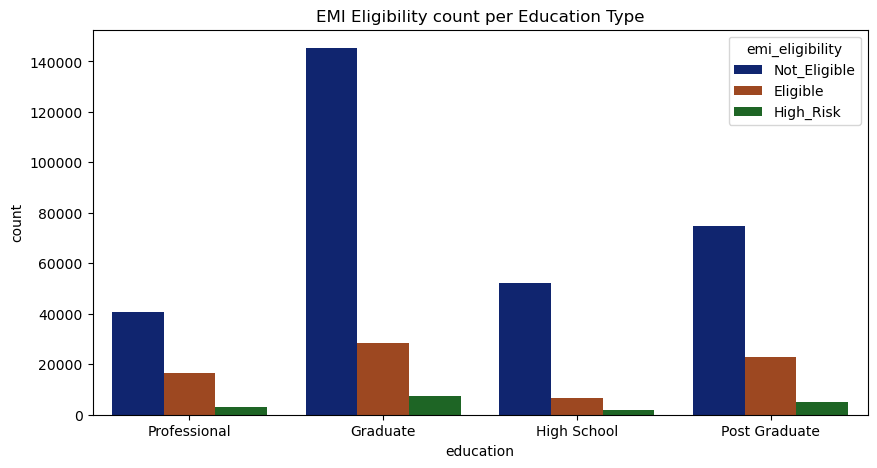

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='education',hue='emi_eligibility',data=df,palette = 'dark')
plt.title("EMI Eligibility count per Education Type")
plt.show()

#### 5. Checking if high salary means high savings

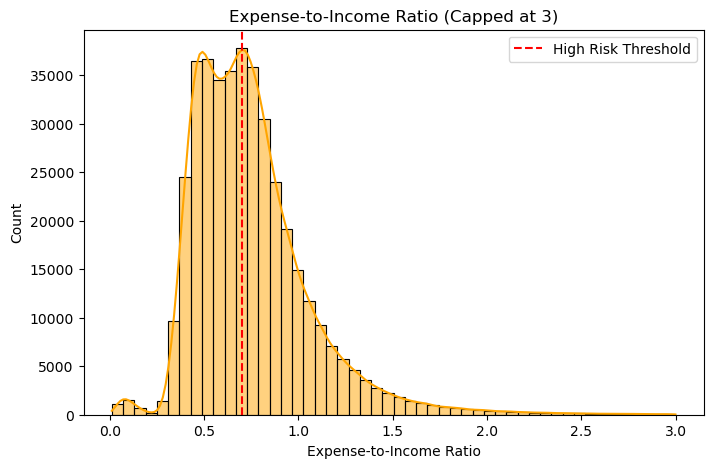

In [41]:
plt.figure(figsize=(8,5))
sns.histplot(df[df['expense_to_income_ratio'] < 3]['expense_to_income_ratio'], bins=50, kde=True, color='orange')
plt.axvline(0.7, color='red', linestyle='--', label='High Risk Threshold')
plt.title("Expense-to-Income Ratio (Capped at 3)")
plt.xlabel("Expense-to-Income Ratio")
plt.ylabel("Count")
plt.legend()
plt.show()

+ A typical person spends approx 30% - 60% of their monthly salary for expenses and above 70% of income spending on expenses leads to high risk.
+ 70% of the dataset falls under the safe (left side of the red line) while around 30% lies on the high risk side.
+ 0 - 0.4 is Safe, 0.5 - 0.7 is Cautious, > 0.7 is High Risk 

#### 6. Pair Plot for all financial features

<Figure size 1000x500 with 0 Axes>

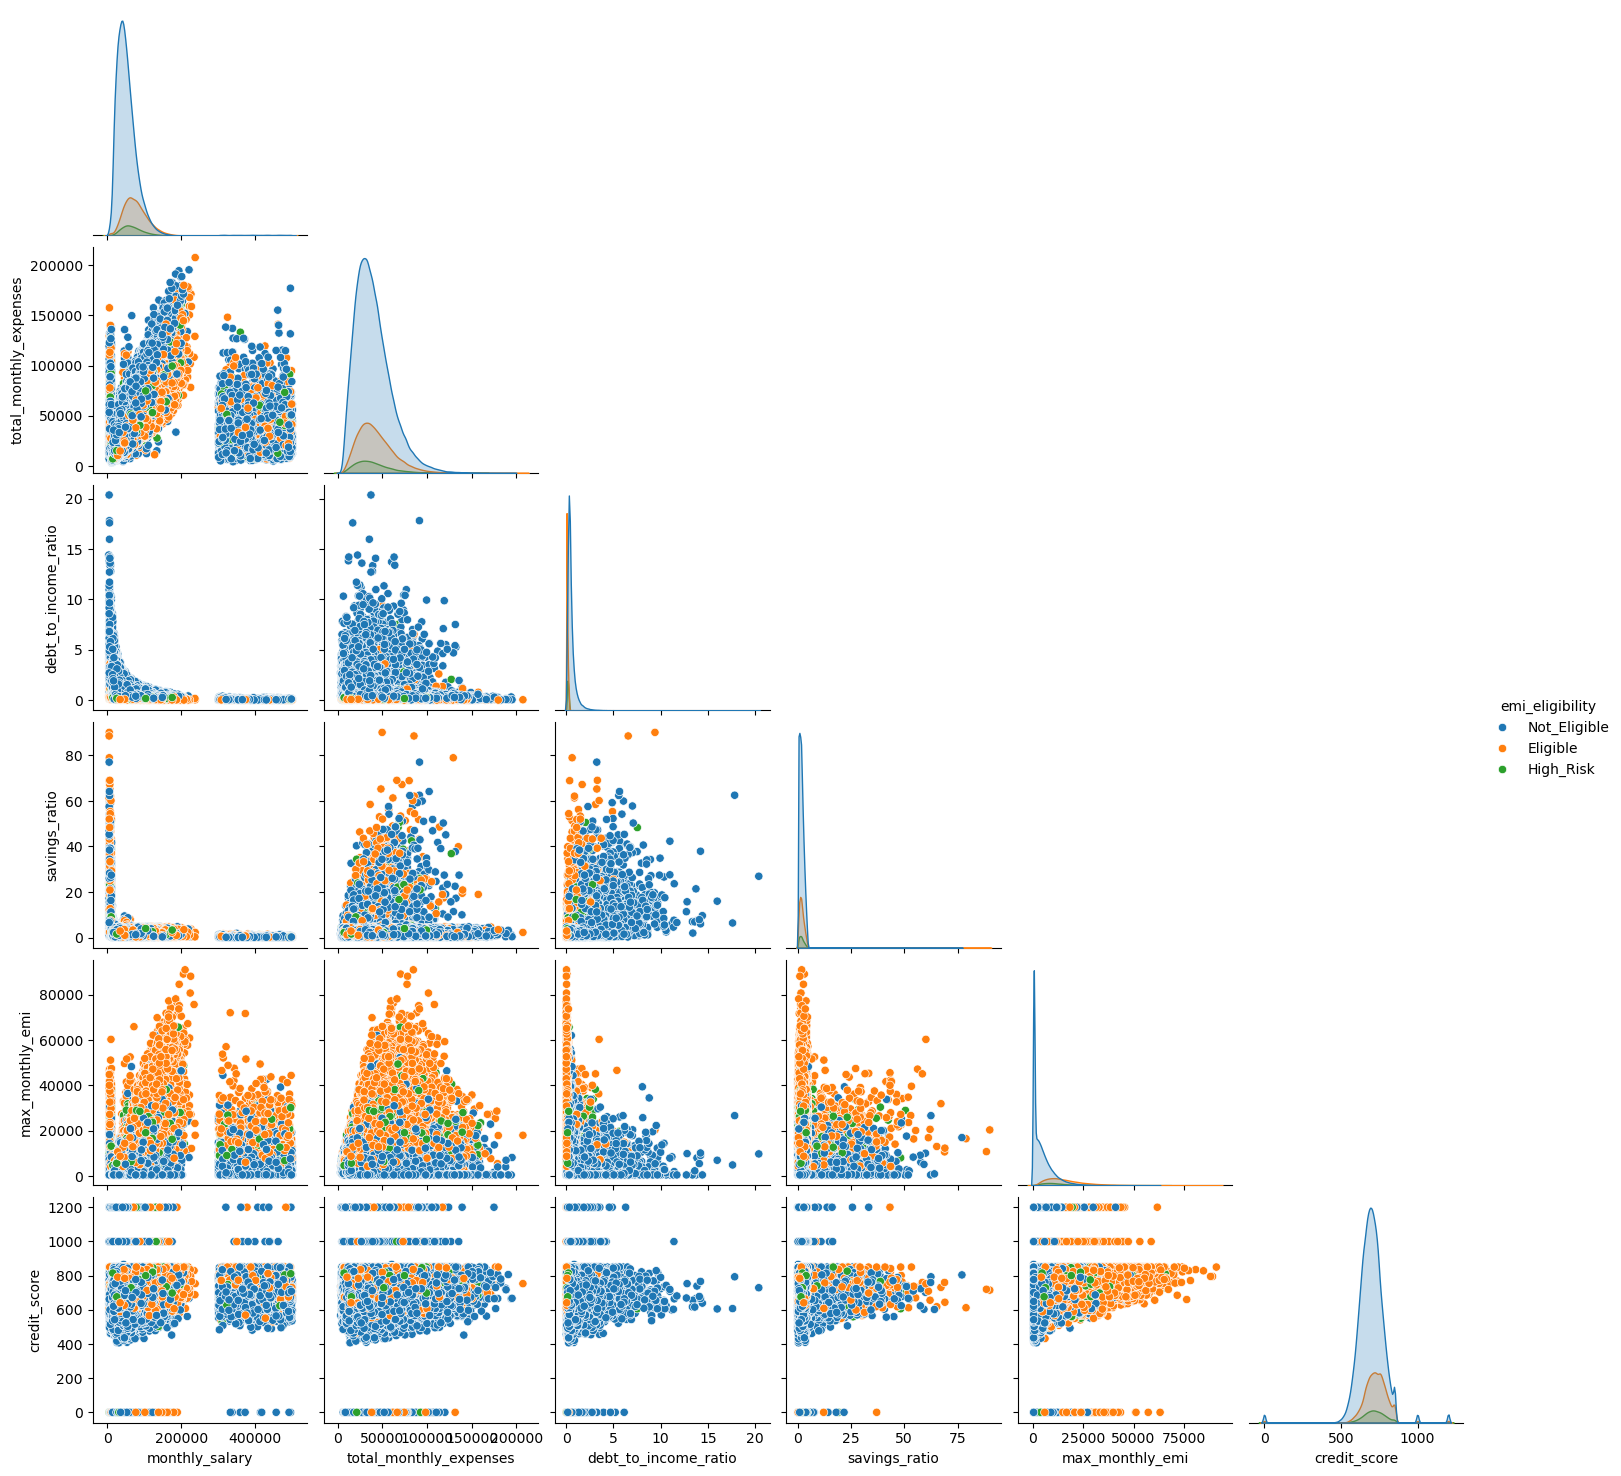

In [42]:
plt.figure(figsize=(10,5))
sns.pairplot(df[['monthly_salary', 'total_monthly_expenses','debt_to_income_ratio','savings_ratio','max_monthly_emi','credit_score','emi_eligibility']],hue='emi_eligibility',corner=True)
plt.show()


### ***ML DEPLOYMENT - Regression***

#### ***1. LinearRegression***

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [44]:
target = 'max_monthly_emi'
num_features = ['monthly_salary', 'total_monthly_expenses', 'disposable_income', 'emi_to_income_ratio','debt_to_income_ratio','savings_ratio','loan_to_salary_ratio','expense_to_income_ratio','dependents_per_income','income_per_person','credit_score','current_emi_amount','years_of_employment']


X = df[num_features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [45]:

num_transformer = Pipeline([
    ('scalar',StandardScaler())
])

preprocessor = ColumnTransformer([('num',num_transformer,num_features)], remainder = 'drop')

pipeline_lr = Pipeline([
    ('pre', preprocessor),
    ('lr', LinearRegression())
])


pipeline_lr.fit(X_train,y_train)
y_pred = pipeline_lr.predict(X_test)


In [46]:

def regression_metrics(y_true, y_pred):
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    return {'rmse':rmse, 'mae':mae, 'r2':r2}

print("LR: ",regression_metrics(y_test, y_pred))

LR:  {'rmse': 6081.72934240846, 'mae': 4072.869055391396, 'r2': 0.37737072748182277}


C:\Users\manav\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


A baseline LinearRegression model applied helps us see that:
+ RMSE: On average, the model is off by 6000 rupees.
+ MAE: The median miss is about 4000 rupees.
+ R2: About 37% of the variance is explained from the dataset.

#### ***2. RandomForestRegressor***

In [49]:
from sklearn.ensemble import RandomForestRegressor


In [50]:
pipeline_rf = Pipeline([
    ('pre',preprocessor),
    ('rf',RandomForestRegressor(n_estimators = 100))
])

pipeline_rf.fit(X_train,y_train)
y_pred = pipeline_rf.predict(X_test)

In [51]:
print("RF: ",regression_metrics(y_test, y_pred))

RF:  {'rmse': 1478.8980077637523, 'mae': 621.9889454224309, 'r2': 0.963182711099236}


C:\Users\manav\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Here we see that RandomForestRegressor is a much better model for this dataset as:
+ RMSE: On an average, the model is off by only 1400 rupees.
+ MAE: The median miss is only about 600 rupees.
+ R2: About 96% of the variance is explained from this dataset.

Now, we will go for hyperparameter tuning to find the best result.

In [52]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [8, 12],
    'rf__min_samples_split': [2, 5],
    'rf__max_features': ['sqrt', 0.5]
}

gs_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=2) # cross validation = 2
gs_rf.fit(X_train, y_train)

print(gs_rf.best_params_)

{'rf__max_depth': 12, 'rf__max_features': 0.5, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}


In [54]:
model_rf = Pipeline([
    ('pre', preprocessor),
    ('rf', RandomForestRegressor(max_depth = 12, max_features = 0.5, min_samples_split= 5, n_estimators = 200))
])

model_rf.fit(X_train, y_train)
y_pred_new = model_rf.predict(X_test)


In [55]:
print("RF_Hypertuned: ",regression_metrics(y_test, y_pred_new))

RF_Hypertuned:  {'rmse': 1496.992843883188, 'mae': 666.2019127890345, 'r2': 0.9622762545105017}


C:\Users\manav\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Here the results show us that the hypertuned values do not make any significant difference in the R2 score, MAE score or the RMSE score. This also says that:
+ The key metrics found are also almost similar to the model trained without any hypertuning.
  
+ RandomForestRegressor() is well calibrated for this dataset to evaluate the maximum emi amount.\

+ We further on try out more powerful models like XGBoost.

RandomForestRegressor is a great model for max emi prediction for this dataset as it covers 96% of the variance in the dataset. The RMSE and MAE are also very minimal and this is due to the robustness and high quality of the model.

#### ***3. XGBoost Regressor***

In [56]:
from xgboost import XGBRegressor

In [57]:
pipeline_xgb = Pipeline([
    ('pre', preprocessor),
    ('xgb', XGBRegressor())
])

pipeline_xgb.fit(X_train, y_train)
y_xgb_pred = pipeline_xgb.predict(X_test)

In [58]:
print("XGBoost: ",regression_metrics(y_test, y_xgb_pred))

XGBoost:  {'rmse': 1498.93844605195, 'mae': 647.1989930257147, 'r2': 0.9621781336726192}


C:\Users\manav\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Here we see that XGBoost is a very similar model to RandomForest for this dataset as:
+ RMSE: On an average, the model is off by only 1500 rupees.
+ MAE: The median miss is only about 600 rupees.
+ R2: About 96% of the variance is explained from this dataset.

These metrics show the similarity between how robust RandomForestRegressor and XGBoost are for such a large dataset.
XGBoost is comparitively faster than RandomForestRegressor and also a better option as it can also use GPU power.

Now, we try to tune the hyperparameters as we did for RandomForestRegressor to find better results if possible. 

In [59]:
parameters_xgb_grid = {
    "xgb__n_estimators": [100, 250, 500],
    "xgb__learning_rate": [0.01, 0.05, 0.1],
    "xgb__max_depth": [3, 5, 7],
    "xgb__subsample": [0.6, 0.8, 1.0],
    "xgb__colsample_bytree": [0.6, 0.8, 1.0]
}

gs_xgb = GridSearchCV(pipeline_xgb, parameters_xgb_grid, cv = 2) # cross validation = 2
gs_xgb.fit(X_train, y_train)

print(gs_xgb.best_params_)

C:\Users\manav\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 7, 'xgb__n_estimators': 500, 'xgb__subsample': 0.6}


In [60]:
model_xgb = Pipeline([
    ('pre',preprocessor),
    ('xgb', XGBRegressor(colsample_bytree = 1.0, learning_rate = 0.05, max_depth = 7, n_estimators = 250, subsample = 1.0))
])

model_xgb.fit(X_train, y_train)
y_xgb_pred_new = model_xgb.predict(X_test)

In [61]:
print("XGBoost_Hypertuned: ",regression_metrics(y_test, y_xgb_pred_new))

XGBoost_Hypertuned:  {'rmse': 1451.0479698824527, 'mae': 608.1388771582331, 'r2': 0.9645563126128689}


C:\Users\manav\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Here the results show us that the hypertuned values do not make any significant difference in the R2 score, MAE score or the RMSE score. This also says that:
+ The key metrics found are also almost similar to the model trained without any hypertuning.
  
+ XGBoost() is extremely fast on large datasets specially like this one to find the maximum emi amount.

#### ***Overall***
XGBoost Regressor is the best regression model for max_emi_prediction for this dataset covered so far. It is fast on large amounts of data, it is robust and the metrics evaluated are accurate.

### ***MLFlow Implementation - Regression***

In [62]:
# Setting up MLflow
import mlflow
import mlflow.sklearn

mlflow.set_experiment("EMI_Regression");

C:\Users\manav\anaconda3\Lib\site-packages\mlflow\tracking\_tracking_service\utils.py:140: FutureWarning: Filesystem tracking backend (e.g., './mlruns') is deprecated. Please switch to a database backend (e.g., 'sqlite:///mlflow.db'). For feedback, see: https://github.com/mlflow/mlflow/issues/18534
  return FileStore(store_uri, store_uri)


In [63]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import mlflow

models = {
    "Linear Regression": pipeline_lr,
    "Random Forest Regressor": pipeline_rf,
    "XGBoost Regressor": pipeline_xgb
}

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):


        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("mean absolute error", mae)
        mlflow.log_metric("mean squared error", mse)
        mlflow.log_metric("r2", r2)


        mlflow.sklearn.log_model(model, model_name.replace(" ", "_"))

        print(f"Logged {model_name} | MAE={mae:.4f} | MSE={mse:.4f} | R2={r2:.4f}");

2025/11/13 10:42:21 WARNING mlflow.utils.git_utils: Failed to import Git (the Git executable is probably not on your PATH), so Git SHA is not available. Error: Failed to initialize: Bad git executable.
The git executable must be specified in one of the following ways:
    - be included in your $PATH
    - be set via $GIT_PYTHON_GIT_EXECUTABLE
    - explicitly set via git.refresh(<full-path-to-git-executable>)

All git commands will error until this is rectified.

This initial message can be silenced or aggravated in the future by setting the
$GIT_PYTHON_REFRESH environment variable. Use one of the following values:
    - quiet|q|silence|s|silent|none|n|0: for no message or exception
    - warn|w|warning|log|l|1: for a warning message (logging level CRITICAL, displayed by default)
    - error|e|exception|raise|r|2: for a raised exception

Example:
    export GIT_PYTHON_REFRESH=quiet

2025/11/13 10:42:22 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instea

Logged Linear Regression | MAE=4072.8691 | MSE=36987431.7943 | R2=0.3774


2025/11/13 10:53:29 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/13 10:53:39 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Random Forest Regressor | MAE=622.5566 | MSE=2199114.8588 | R2=0.9630


2025/11/13 10:53:49 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/13 10:53:57 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged XGBoost Regressor | MAE=647.1990 | MSE=2246816.4651 | R2=0.9622


![MLflow-Classification](images/mlflowref.png)

### ***ML DEPLOYMENT - Classification***

#### ***1. Logistic Regression***

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [65]:
def classification_metrics(y_true, y_pred):
    print("Accuracy: ",accuracy_score(y_true, y_pred))
    print("\n")
    print("Classification Report: ",classification_report(y_true, y_pred))
    print("\n")
    print("Confusion Matrix: \n",confusion_matrix(y_true, y_pred))
    print("\n")


In [66]:
X = df.drop('emi_eligibility',axis = 1)

y = df['emi_eligibility']

In [67]:
y = y.astype('category')

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [69]:
num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object','category']).columns

num_transformer = Pipeline([
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown = 'ignore'))
])

preprocessor = ColumnTransformer([
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

In [70]:
from sklearn.linear_model import LogisticRegression

pipe_lr = Pipeline([
    ('pre', preprocessor),
    ('lr', LogisticRegression(max_iter = 10000))
])

pipe_lr.fit(X_train, y_train)
y_pred_lr = pipe_lr.predict(X_test)

In [71]:
classification_metrics(y_test, y_pred_lr)

Accuracy:  0.9518280632411067


Classification Report:                precision    recall  f1-score   support

    Eligible       0.91      0.96      0.94     14920
   High_Risk       0.62      0.23      0.34      3539
Not_Eligible       0.97      0.99      0.98     62501

    accuracy                           0.95     80960
   macro avg       0.83      0.73      0.75     80960
weighted avg       0.94      0.95      0.94     80960



Confusion Matrix: 
 [[14350   191   379]
 [ 1044   829  1666]
 [  303   317 61881]]




LogisticRegression model performs strongly well for this dataset predicting the emi_eligibilty.

+ There is an excellent precision(0.97) and recall(0.96) for Not_Eligible so the model can easily predict if the applicant is not eligibile for emi.
  
+ The recall(0.96) and precision(0.91) for Eligible is also quite high and there is a positive seperation and the model can predict if the applicant is Eligible for emi.

+ The recall(0.23) of the High_Risk class is pretty low. This says that a linear decision boundary is not sufficient and it is also because it is a minority class. The model fails to identify the applicants with High_Risk.

The overall accuracy is 95.18% and for a base model it performed exceptionally well. However, and important class of High_Risk has a recall of 0.23 which makes this model fail.

#### ***2. Support Vector Classifier***

In [72]:
from sklearn.svm import SVC

pipe_svc = Pipeline([
    ('pre', preprocessor),
    ('svc', SVC())
])

pipe_svc.fit(X_train, y_train)
y_pred_svc = pipe_svc.predict(X_test)

In [73]:
classification_metrics(y_test, y_pred_svc)

Accuracy:  0.9797430830039525


Classification Report:                precision    recall  f1-score   support

    Eligible       0.97      0.98      0.97     14920
   High_Risk       0.86      0.70      0.77      3539
Not_Eligible       0.99      1.00      0.99     62501

    accuracy                           0.98     80960
   macro avg       0.94      0.89      0.91     80960
weighted avg       0.98      0.98      0.98     80960



Confusion Matrix: 
 [[14585   224   111]
 [  391  2470   678]
 [   57   179 62265]]




The baseline SVC model performed exceptionally well.
+ It handled "Eligible" and "Not Eligible" classes with high precision and recall.
  
+ The "High Risk" class was predicted with moderate success of about 0.70 Recall. This is expected as it is the minority class.

The model without tuning itself generalized well enough. We try to tune the hyperparameters to see if better results are found. For that we use RandomizedSearchCV.

In [74]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform


X_sample = X_train.sample(frac = 0.3, random_state=42)
y_sample = y_train.sample(frac = 0.3, random_state=42)

param_dist_svc = {
    'svc__C': uniform(0.1, 10),
    'svc__gamma': ['scale', 'auto'],
    'svc__kernel': ['linear', 'rbf']
}

rs_svc = RandomizedSearchCV(
    pipe_svc,
    param_dist_svc,
    n_iter = 5,
    cv = 2,
    n_jobs = -1,
    random_state = 42
)

We work the RandomizedSearchCV() on only 30% of the dataset as it is quite a large dataset and svc is a heavy model, so it takes large amounts of time to evaluate the result.

In [75]:
rs_svc.fit(X_sample, y_sample)

print(rs_svc.best_params_)

{'svc__C': 7.41993941811405, 'svc__gamma': 'scale', 'svc__kernel': 'linear'}


In [76]:
from sklearn.svm import LinearSVC

pipe_lsvc = Pipeline([
    ('pre', preprocessor),
    ('lsvc', LinearSVC(C=7.41, max_iter=10000, random_state = 42))
])

pipe_lsvc.fit(X_train, y_train)
y_pred_lsvc = pipe_lsvc.predict(X_test)

In [77]:
classification_metrics(y_test, y_pred_lsvc)

Accuracy:  0.9411561264822135


Classification Report:                precision    recall  f1-score   support

    Eligible       0.89      0.95      0.92     14920
   High_Risk       0.00      0.00      0.00      3539
Not_Eligible       0.95      0.99      0.97     62501

    accuracy                           0.94     80960
   macro avg       0.61      0.65      0.63     80960
weighted avg       0.90      0.94      0.92     80960



Confusion Matrix: 
 [[14197     1   722]
 [ 1320     0  2219]
 [  502     0 61999]]




Although the tuned model used the best parameters found through RandomizedSearchCV(), performance was yet dropped compared to the baseline.

+ The linear kernel simplified the model, but it failed to capture the non-linear patters in the data specially the "High_Risk" class.
  
+ The baseline SVC uses the rbf model which showed better results as it performed well for linear as well as non linear class.

Hence, the baseline SVC with RBF kernel (even though it is quite time taking) remains the preferred model. It has worked far better than the base Logistic Regression model specially in predicting the High_Risk class

#### ***2. XGBoost Classifier***

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)
y_test_enc = le.fit_transform(y_test)

In [79]:
from xgboost import XGBClassifier

pipe_xgbc = Pipeline([
    ('pre', preprocessor),
    ('xgb',XGBClassifier(random_state = 42))
])

pipe_xgbc.fit(X_train, y_train_enc)
y_pred_xgbc = pipe_xgbc.predict(X_test)

In [80]:
y_pred_labels = le.inverse_transform(y_pred_xgbc)

In [81]:
classification_metrics(y_test, y_pred_labels)

Accuracy:  0.9842267786561265


Classification Report:                precision    recall  f1-score   support

    Eligible       0.98      0.98      0.98     14920
   High_Risk       0.86      0.77      0.81      3539
Not_Eligible       0.99      1.00      0.99     62501

    accuracy                           0.98     80960
   macro avg       0.94      0.92      0.93     80960
weighted avg       0.98      0.98      0.98     80960



Confusion Matrix: 
 [[14667   243    10]
 [  349  2714   476]
 [    5   194 62302]]




The baseline XGBoost Classifier itself performs better than the previous models.
It classifies all three classes effectively. The accuracy is 98.42%.

+ The High_Risk class that was poorly classified earlier in the previous models is now performs better and is more accurate.
  
+ The confusion matrix shows minor missclassifications between the High_Risk and Eligible Groups which is expected.

The XGBoost model is extremely robust and fast which makes it the best classification model so far. We will try to optimized the hyperparameters to find better results.

In [82]:
param_dist_xgb = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.05, 0.1],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0]
}


rs_xgb = RandomizedSearchCV(
    pipe_xgbc,
    param_distributions= param_dist_xgb,
    n_iter = 10,
    cv = 2,
    n_jobs = -1,
    random_state= 42,
    verbose = 2  # we make it talkative this time
)

rs_xgb.fit(X_train, y_train_enc)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


RandomizedSearchCV(cv=2,
                   estimator=Pipeline(steps=[('pre',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               Index(['age', 'monthly_salary', 'years_of_employment', 'monthly_rent',
       'family_size', 'dependents', 'school_fees', 'college_fees',
       'travel_expenses', 'groceries_utilities', 'other_monthly_expenses',
       'current_emi_amount'...
                                                            min_child_weight=None,
                                                            missing=nan,
                                                            monotone_constraints=None,
                                                            multi_strategy=None,
                                                            n_estimators=None,
                                                            n_jobs=None,
                                                            num_parallel_tree=None, ...))]),
                   n_jobs=-1,
                   param_distributions={'xgb__colsample_bytree': [0.6, 0.8,
                                                                  1.0],
                                        'xgb__learning_rate': [0.01, 0.05, 0.1],
                                        'xgb__max_depth': [3, 5, 7],
                                        'xgb__n_estimators': [100, 200, 300],
                                        'xgb__subsample': [0.6, 0.8, 1.0]},
                   random_state=42, verbose=2)

In [83]:
y_pred_xgbc_hypertuned = rs_xgb.predict(X_test)
y_hyp_labels = le.inverse_transform(y_pred_xgbc_hypertuned)

In [84]:
classification_metrics(y_test, y_hyp_labels)

Accuracy:  0.9852272727272727


Classification Report:                precision    recall  f1-score   support

    Eligible       0.98      0.99      0.98     14920
   High_Risk       0.88      0.77      0.82      3539
Not_Eligible       0.99      1.00      0.99     62501

    accuracy                           0.99     80960
   macro avg       0.95      0.92      0.93     80960
weighted avg       0.98      0.99      0.98     80960



Confusion Matrix: 
 [[14706   205     9]
 [  324  2731   484]
 [    6   168 62327]]




The tuned model shows minor improvements in classifying the model.

+ The High_Risk class F1-score improved from 0.81 to 0.82.

+ Since the baseline itself was so strong the improvement seen here is marginal but it is still better and efficient.

+ Tuning helped fine-tune the model parameters to achieve a better bias-variance trade off as we see here.

After tuning the hyperparameters, the XGBoost model gives an accuracy of 98.47% and a better F1-score of the High_Risk class.
This is a very well calibrated and robust model for such a large dataset.

#### ***Overall***
XGBoost Classifier is the best classification model for this dataset with an accuracy of 98.47%. It is faster than the other classification models and it also has the highest accurate prediction for the High_Risk class along with the other two classes.

### ***MLFlow Implementation - Classification***

In [85]:
# Setting up MLflow
import mlflow
import mlflow.sklearn

mlflow.set_experiment("EMI_Classification");

In [86]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import mlflow

models = {
    "Logistic Regression": pipe_lr,
    "Support Vector Classifier": pipe_svc,
    "XGBoost Classifier": pipe_xgbc
}

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):

        if model_name == "XGBoost Classifier":
            
            model.fit(X_train,y_train_enc)
            y_pred = model.predict(X_test)
            y_pred_labels = le.inverse_transform(y_pred)
            
            acc = accuracy_score(y_test, y_pred_labels)
            f1 = f1_score(y_test, y_pred_labels, average='weighted')

        else:

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
    
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='weighted')

        mlflow.log_param("model_name", model_name)
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("f1_score", f1)

        if model_name == 'Support Vector Classifier':
            svc_params = model.named_steps['svc'].get_params()
            mlflow.log_params({
                "kernel": svc_params['kernel'],
                "C": svc_params['C'],
                "gamma": svc_params['gamma']
            })

        mlflow.sklearn.log_model(model, model_name.replace(" ", "_"))

        print(f"Logged {model_name} | Accuracy={acc:.4f} | F1={f1:.4f}");

2025/11/13 12:28:31 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/13 12:28:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Logistic Regression | Accuracy=0.9518 | F1=0.9433


2025/11/13 13:25:03 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/13 13:25:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged Support Vector Classifier | Accuracy=0.9797 | F1=0.9788


2025/11/13 13:25:17 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/11/13 13:25:22 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged XGBoost Classifier | Accuracy=0.9842 | F1=0.9838


![MLflow-Classification](images/mlflowclass.png)